# Homework 3 (Full mark: 250pt)
- Questions 1~5: Conceptual
- Questions 6~11: Programming

# Conceptual questions

# 1. Variance (10pt)

**Using basic statistical properties of the variance, as well as single variable calculus, derive the below equation. In other words, prove that $\alpha$ given below does indeed minimize $\operatorname{Var}(\alpha X+(1-\alpha) Y)$.**

$$
\begin{array}{c}
\alpha=\frac{\sigma_{Y}^{2}-\sigma_{X Y}}{\sigma_{X}^{2}+\sigma_{Y}^{2}-2 \sigma_{X Y}}
\end{array}
$$

We have $\mathrm{Var}(\alpha X + (1 - \alpha) Y) = \alpha^2\sigma_X^2 + (1 - \alpha)^2\sigma_Y^2 + 2\alpha(1 - \alpha)\sigma_{XY}$.
We now take the fist derivative of $\mathrm{Var}(\alpha X + (1 - \alpha) Y)$ relative to $\alpha$ and we get $\frac{\partial}{\partial\alpha}\mathrm{Var}(\alpha X + (1 - \alpha) Y) = 2\alpha\sigma_X^2 - 2\sigma_Y^2 + 2\alpha\sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY}$.
We now seek critical points by equalling the last expression to $0$, $2\alpha\sigma_X^2 - 2\sigma_Y^2 + 2\alpha\sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY} = 0$, which implies that $\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$.
It remains to check that this point is in fact a minimum, this is equivalent to prove that the second derivative is positive,
$\frac{\partial^2}{\partial\alpha^2}\mathrm{Var}(\alpha X + (1 - \alpha) Y) = 2\sigma_X^2 + 2\sigma_Y^2 - 4\sigma_{XY} = 2\mathrm{Var}(X - Y)\ge 0$.

# 2. Estimating the standard deviation of prediction (10pt)
**Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.**

Bootstrap could be used in this situation. Let the original data $Z$ contains $n$ observations, then we create $B$ bootstrap samples from the data. We choose samples from $n$ observations with replacement, for $B$ times. For each of $B$ number of datasets, we can train a supervised learning method and use it to make our estimate for the ‘particular value of $X$’. Let our bootstrap samples as $Z^{*1}, ..., Z^{*B}$ and let the standar deviations of each sample as $\alpha^{*1}, ..., \alpha^{*B}$. Then our estimated $\alpha$ would be $\frac{1}{B}\sum_{b=1}^B\hat{\alpha}^{*b}$ and standard error of it would be $SE_{B}(\hat{\alpha})= \sqrt{\frac{1}{B-1}\sum_{b=1}^B \left(\hat{\alpha}^{*b} - \frac{1}{B}\sum_{b'=1}^B \hat{\alpha}^{*b'} \right)}$. This provides the bootstrap estimate for the standard error of our estimate.

# 3. Subset selection method (15pt)

**We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p + 1$ models, containing $0, 1, 2,..., p$ predictors. Explain your answers:**

**(a) Which of the three models with $k$ predictors has the smallest training RSS?**

Best subset selection would have the smallest trainging RSS, because it tries all $p \choose k$ combinations. Otherwise, forward and backward selections do not guarantee the smallest RSS. When performing forward stepwise selection, the model with $k$ predictors is the model with the smallest RSS among the $p−k$ models which augment the predictors in $M_{k−1}$ with one additional predictor. When performing backward stepwise selection, the model with $k$ predictors is the model with the smallest RSS among the $k$ models which contains all but one of the predictors in $M_{k+1}$.

**(b) Which of the three models with $k$ predictors has the smallest test RSS?**

This question does not have certain answer. We can assure that best subset selection would have the smallest trainging RSS, because it tries all $p \choose k$ combinations. However, test RSS is not predictable based on selection method.

(c) True or False:
- i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.
- ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by backward stepwise selection.
- iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by forward stepwise selection.
- iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.
- v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

i. True. $M_{k+1}$ predictors is obtained by augmenting the predictors in $M_{k}$ with one additional predictor.
ii. True. $M_{k}$ is obtained by removing one predictor (which is least likely in the model) from $M_{k+1}$.
iii. False. We cannot say that the backward selection is the reverse step of the forward selection. There is no direct link between two processes.
iv. False. We cannot say that the backward selection is the reverse step of the forward selection. There is no direct link between two processes.
v. False. We cannot say that k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection. For example, let there are three variables $x_{1}$, $x_{2}$ and $x_{3}$. Even though $M_{1}$ contains $x_{1}$, $M_{2}$ could contain $x_{2}$ and $x_{3}$.

# 4. Lasso (25pt)

Suppose we estimate the regression coefficients in a linear regression model by minimizing
$$
\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j}\right)^{2} \quad \text { subject to } \quad \sum_{j=1}^{p}\left|\beta_{j}\right| \leq s
$$
for a particular value of $s$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

**(a) As we increase $s$ from 0 , the training RSS will:**
- i. Increase initially, and then eventually start decreasing in an inverted U shape.
- ii. Decrease initially, and then eventually start increasing in a U shape.
- iii. Steadily increase.
- iv. Steadily decrease.
- v . Remain constant.

Steadily decrease. Increasing s means that $\beta_{j}$ coefficients less tends to be zero. This implies that we less penalize unnecessary variable. Hence as we increase s from 0, we are restricting the $\beta_{j}$ coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming flexible which provokes a steady decrease in the training RSS.

**(b) Repeat (a) for test RSS.**

Decrease initially, and then eventually start increasing in a U shape. Test RSS would decrease initially, but after the critical minimum (local minima) it would increases. Increasing s means that $\beta_{j}$ coefficients less tends to be zero. This implies that we less penalize unnecessary variable. As we increase s from 0, we are less restricting the $\beta_{j}$ coefficients (the coefficients will increase to their least squares estimates), and so the model is becoming flexible which provokes at first a decrease in the test RSS before increasing again after that in a U shape.

**(c) Repeat (a) for variance.**

Steadily increase. Similar to part (a), increasing s from 0, we are less restricting the $\beta_{j}$ coefficients (the coefficients will increase to their least squares estimates), and so the model is becoming flexible which provokes a steady increase in variance.

**(d) Repeat (a) for (squared) bias.**

Steadily decrease. Due to the bias-variance trade-off, we can expect that bias would steadily decrease. Increasing s from 0, we are less restricting the $\beta_{j}$ coefficients (the coefficients will increase to their least squares estimates), and so the model is becoming flexible. Hence, bias decreases.

**(e) Repeat (a) for the irreducible error.**

Remain constant. The irreducible error is just a noise, so does not depent on the model. Hence the coefficient restriction will not affect it at all.

# 5. Ridge regression (25pt)

Suppose we estimate the regression coefficients in a linear regression model by minimizing
$$
\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j}\right)^{2}+\lambda \sum_{j=1}^{p} \beta_{j}^{2}
$$
for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through $\mathrm{v}$. is correct. Justify your answer.

**(a) As we increase $\lambda$ from 0 , the training RSS will:**
- i. Increase initially, and then eventually start decreasing in an inverted U shape.
- ii. Decrease initially, and then eventually start increasing in a U shape.
- iii. Steadily increase.
- iv. Steadily decrease.
- v. Remain constant.

Steadily increase. Increasing $\lambda$ means that $\beta_{j}$ coefficients tends to be zero. This implies that we penalize unnecessary variable more. Hence, as we increase $\lambda$ from 0, we are restricting the $\beta_{j}$ coefficients more (the coefficients will decrease to their least squares estimates), and so the model is becoming inflexible which makes a steady increase in the training RSS.

**(b) Repeat (a) for test RSS.**

Decrease initially, and then eventually start increasing in a U shape. Test RSS would decrease initially, but after the critical minimum (local minima) it would increases. Increasing $\lambda$ means that $\beta_{j}$ coefficients tends to be zero. This implies that we penalize unnecessary variable more. Hence, as we increase $\lambda$ from 0, we are restricting the $\beta_{j}$ coefficients more (the coefficients will decrease to their least squares estimates), and so the model is becoming inflexible which makes, at first a decrease in the test RSS before increasing again after that in a U shape.

**(c) Repeat (a) for variance.**

Steadily decrease. Increasing $\lambda$ from 0, we are more restricting the $\beta_{j}$ coefficients (the coefficients will deviate from their least squares estimates), and so the model is becoming inflexible which makes a steady decrease in variance.

**(d) Repeat (a) for (squared) bias.**

Steadily increase. Due to the bias-variance trade-off, we can expect that bias would steadily increase. Increasing $\lambda$ from 0, we are more restricting the $\beta_{j}$ coefficients (the coefficients will deviate from their least squares estimates), and so the model is becoming inflexible which makes a steady increase in bias.

**(e) Repeat (a) for the irreducible error.**

Remain constant. The irreducible error is just a noise, so does not depent on the model. Hence the coefficient restriction will not affect it at all.

# Programming questions

# 6. Validation Set Approach (20pt)

In Chapter 4, we used logistic regression to predict the probability of ````default```` using ````income```` and ````balance```` on the ````Default```` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

df = pd.read_csv('data/Default.csv',index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


**(a) Fit a logistic regression model that uses ````income```` and ````balance```` to predict ````default````.**

In [2]:
X = df[["balance", "income"]]
y = df["default"]
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X, y)
ols_sklearn.coef_

array([[5.6471e-03, 2.0809e-05]])

**(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:**
- i. Split the sample set into a training set and a validation set (75%:25%).
- ii. Fit a multiple logistic regression model using only the training observations.
- iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the ````default```` category if the posterior probability is greater than 0.5.
- iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"], test_size = 0.25, random_state = 312)
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X_train, y_train)
1 - ols_sklearn.score(X_test, y_test)

0.02839999999999998

For this train-test split, we had a validation set error of 0.0284, or 2.84% of the observations in the validation set that are misclassified.

**(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"], test_size = 0.25, random_state = 456)
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X_train, y_train)
1 - ols_sklearn.score(X_test, y_test)

0.03200000000000003

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"], test_size = 0.25, random_state = 789)                                                   
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X_train, y_train)
1 - ols_sklearn.score(X_test, y_test)

0.034399999999999986

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[["balance", "income"]], df["default"],  test_size = 0.25, random_state = 314159)
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X_train, y_train)
1 - ols_sklearn.score(X_test, y_test)

0.031200000000000006

In [7]:
(df["default"] != "No").mean()

0.0333

**(d) Now consider a logistic regression model that predicts the probability of ````default```` using ````income````, ````balance````, and a dummy variable for ````student````. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for ````student```` leads to a reduction in the test error rate.**

In [8]:
np.random.seed(312)
with_student = {}
without_student = {}

# Create two classifier pipelines
# with_student takes the student variable and encodes it using one hot encoding, passes through income, balance
# without_student drops the student variable and only passes through income and balance
categorical_features = ["student"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["income", "balance"]
with_student_preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features), ("num", "passthrough", numerical_features)])
with_student_clf = Pipeline([("preprocessor", with_student_preprocessor), ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])              
without_student_preprocessor = ColumnTransformer([("num", "passthrough", numerical_features)])
without_student_clf = Pipeline([("preprocessor", without_student_preprocessor), ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])
                
# Loop through 50 train-test splits to compute average difference in error rate
for i in range(50):
    # Split the data in to training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df, df["default"], test_size = 0.25)
    # Fit classifier which includes student variable and compute validation set error
    with_student_clf.fit(X_train, y_train)
    with_student[i] = 1 - with_student_clf.score(X_test, y_test)
    # Fit classifier which excludes student variable and compute validation set error
    without_student_clf.fit(X_train, y_train)
    without_student[i] = 1 - without_student_clf.score(X_test, y_test)
errors = pd.DataFrame({"with_student": with_student, "without_student": without_student})
errors["difference"] = errors["with_student"] - errors["without_student"]
errors["difference"].mean()

0.0021280000000000075

# 7. Leave-one-out cross validation (LOOCV) (25pt)

**Compute the LOOCV error for a simple logistic regression model on the Weekly data set.**

In [9]:
weekly = pd.read_csv("data/Weekly.csv")
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction']

(a) Fit a logistic regression model that predicts ````Direction```` using ````Lag1```` and ````Lag2````.

In [10]:
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X, y)
print(ols_sklearn.coef_, ols_sklearn.intercept_)

[[-0.0387  0.0602]] [0.2212]


(b) Fit a logistic regressionmodel that predicts ````Direction```` using ````Lag1```` and ````Lag2```` using all but the first observation.

In [11]:
X_loo = weekly.loc[weekly.index != 0, ["Lag1", "Lag2"]]
y_loo = weekly.loc[weekly.index != 0, "Direction"]
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
ols_sklearn.fit(X_loo, y_loo)
print(ols_sklearn.coef_, ols_sklearn.intercept_)

[[-0.0384  0.0608]] [0.2232]


(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(Direction="Up"|Lag1, Lag2) > 0.5$. Was this observation correctly classified?

In [12]:
ols_sklearn.predict_proba(weekly.loc[0, ["Lag1", "Lag2"]].to_frame().T)

array([[0.4286, 0.5714]])

In [13]:
ols_sklearn.predict(weekly.loc[0, ["Lag1", "Lag2"]].to_frame().T)

array(['Up'], dtype=object)

Using the model from Part 2, we predict that the first observation will go up, since the predicted posterior probability from the model is 0.4286 that the direction will be down and 0.5714 that the direction will be up. This observation was incorrectly classified.

(d) Write a for loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:
- i. Fit a logistic regression model using all but the ith observation to predict ````Direction```` using ````Lag1```` and ````Lag2````.
- ii. Compute the posterior probability of the market moving up for the ith observation.
- iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
- iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [14]:
n = weekly.shape[0]
scores = np.empty(n)
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
for i in range(n):
    X_loo = weekly.loc[weekly.index != i, ["Lag1", "Lag2"]]
    y_loo = weekly.loc[weekly.index != i, "Direction"]
    ols_sklearn.fit(X_loo, y_loo)
    scores[i] = ols_sklearn.score(weekly.loc[i, ["Lag1", "Lag2"]].to_frame().T, pd.Series(weekly.loc[i, "Direction"]))

(e) Take the average of the $n$ numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [15]:
scores.mean()

0.5500459136822773

In [16]:
errors = 1 - scores
errors.mean()

0.44995408631772266

In [17]:
X = weekly[["Lag1", "Lag2"]]
y = weekly["Direction"]
ols_sklearn = LogisticRegression(penalty = "none", solver = "lbfgs")
loo = LeaveOneOut()
cv_scores = cross_val_score(ols_sklearn, X, y, cv = loo)
cv_scores.mean()

0.5500459136822773

In [18]:
1 - cv_scores.mean()

0.4499540863177227

In [19]:
(weekly["Direction"] != "Up").mean()

0.4444444444444444

The LOOCV estimate for the test error is approximately 0.45, which matches the value we get if we use cross_val_score() with the LeaveOneOut() splitter to compute the error. This tells us that the logistic regression model using Lag1 and Lag2 to predict Direction by using a probability threshold of 0.5 performed a bit better than randomly guessing. However, it is important to note that we get essentially the same error rate with a naive strategy of predicting that the market will go up every week.

Note that when using cross_val_score to compute the LOOCV test error, it computes scores using the score() function associated with the estimator class by default. In the case of logistic regression with two classes, this is the accuracy score computed using a posterior probability threshold of 0.5. However, it is important to note that performing classification using logistic regression like we have done in this chapter involves choosing a probability threshold for assigning class predictions, based on the posterior probabilities predicted by the logistic regresion model. Since on its own logistic regression is not a classification method, we may wish to instead compute scores/errors associated with the posterior probabilities instead. To do that, we should either pick one of the scorers or metrics as discussed in the scikit-learn documentation and supply that for the scoring argument.

# 8. Shrinkage methods + Dimension reduction (35pt)

In this exercise, we will predict the number of applications received using the other variables in the ````College```` data set.

**(a) Split the data set into a training set and a test set.**

In [20]:
college = pd.read_csv("data/College.csv")
college = college.rename(columns={'Unnamed: 0': 'Name'})
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
msk = np.random.rand(len(college)) < 0.8
train = college[msk]
test = college[~msk]

**(b) Fit a linear model using least squares on the training set, and report the test error obtained.**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=True)
model.fit(train.drop(['Name', 'Apps'], axis=1), train['Apps'])
predictions = model.predict(test.drop(['Name', 'Apps'], axis=1))

print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))

Test Error: 762351.0764267098


**(c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.**

In [22]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
# Leave one out cross-validation
model = RidgeCV(alphas=alphas, fit_intercept=True, cv=None, store_cv_values=True)
model.fit(train.drop(['Name', 'Apps'], axis=1), train['Apps'])

predictions = model.predict(test.drop(['Name', 'Apps'], axis=1))
print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))

Test Error: 765426.9283435798


**(d) Fit a lasso model on the training set, with $\lambda$ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.**

In [23]:
from sklearn.linear_model import LassoCV

# Leave one out cross-validation
model = LassoCV(alphas=alphas, fit_intercept=True, cv=None)
model.fit(train.drop(['Name', 'Apps'], axis=1), train['Apps'])

predictions = model.predict(test.drop(['Name', 'Apps'], axis=1))
print("Test Error: " +str(mean_squared_error(test['Apps'], predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))

C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163293275.55332994, tolerance: 917027.6410419678
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174333534.61943668, tolerance: 917027.6410419678
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184458144.064299, tolerance: 917027.6410419678
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\li

Test Error: 762351.0764267208
Number of Non-zero coefficients: 17


**(e) Fit a PCR model on the training set, with $M$ chosen by crossvalidation. Report the test error obtained, along with the value of $M$ selected by cross-validation.**

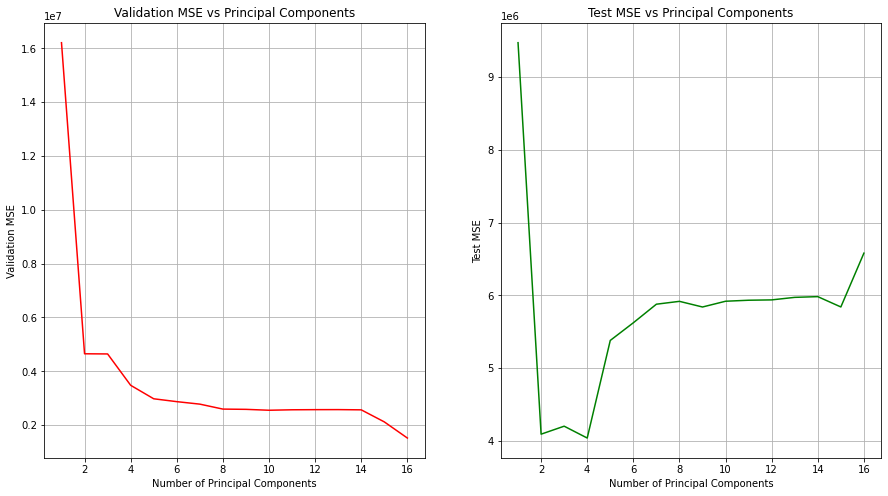

In [24]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def PCR_CV(X_train, Y_train, X_test, Y_test, M):
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)

    MSE = {}
    test_MSE = {}

    for m in M: # Iterate over number of principal components
        pca = PCA(n_components=m)
        X_train_reduced = pca.fit_transform(X_train_scaled)
        X_test_reduced = pca.fit_transform(X_test_scaled)

        mse = 0
        test_mse = 0
        loo = LeaveOneOut() # Leave one out cross-validation
        for train_index, test_index in loo.split(X_train_reduced):
            X, X_CV = X_train_reduced[train_index], X_train_reduced[test_index]
            Y, Y_CV = Y_train[train_index], Y_train[test_index]
            model = LinearRegression(fit_intercept=True)
            model.fit(X, Y)
            p = model.predict(X_CV)
            mse += mean_squared_error(p, Y_CV)
        MSE[m] = mse/len(X_train_reduced)

        # Compute test MSE for the model
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train_reduced, Y_train)
        p = model.predict(X_test_reduced)
        test_MSE[m] = mean_squared_error(p, Y_test)

    # Plot validation MSE
    lists = sorted(MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(121)
    plt.plot(x, y, color='r')
    plt.grid()
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Validation MSE vs Principal Components')

    lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax = fig.add_subplot(122)
    plt.plot(x, y, color='g')
    plt.grid()
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Test MSE')
    ax.set_title('Test MSE vs Principal Components')
    plt.show()

M = np.arange(1, 17, 1) # Principal components
PCR_CV(train.drop(['Name', 'Apps'], axis=1), train['Apps'].values, test.drop(['Name', 'Apps'], axis=1),
       test['Apps'], M)

**(f) Fit a PLS model on the training set, with $M$ chosen by crossvalidation. Report the test error obtained, along with the value of $M$ selected by cross-validation.**

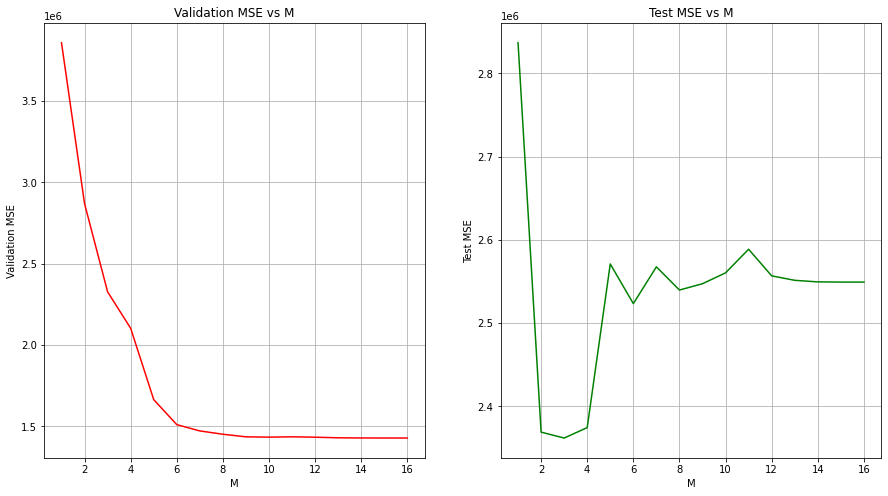

In [25]:
from sklearn.cross_decomposition import PLSRegression

def PLS_CV(X_train, Y_train, X_test, Y_test, M):
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)

    MSE = {}
    test_MSE = {}

    for m in M: # Iterate over number of principal components
        mse = 0
        test_mse = 0
        loo = LeaveOneOut() # Leave one out cross-validation
        for train_index, test_index in loo.split(X_train_scaled):
            X, X_CV = X_train_scaled[train_index], X_train_scaled[test_index]
            Y, Y_CV = Y_train[train_index], Y_train[test_index]
            model = PLSRegression(n_components=m)
            model.fit(X, Y)
            p = model.predict(X_CV)
            mse += mean_squared_error(p, Y_CV)
        MSE[m] = mse/len(X_train_scaled)

        # Compute test MSE for the model
        model = PLSRegression(n_components=m)
        model.fit(X_train_scaled, Y_train)
        p = model.predict(X_test_scaled)
        test_MSE[m] = mean_squared_error(p, Y_test)

    # Plot validation MSE
    lists = sorted(MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(121)
    plt.plot(x, y, color='r')
    plt.grid()
    ax.set_xlabel('M')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Validation MSE vs M')

    lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax = fig.add_subplot(122)
    plt.plot(x, y, color='g')
    plt.grid()
    ax.set_xlabel('M')
    ax.set_ylabel('Test MSE')
    ax.set_title('Test MSE vs M')
    plt.show()

M = np.arange(1, 17, 1) # Principal components
PLS_CV(train.drop(['Name', 'Apps'], axis=1), train['Apps'].values, test.drop(['Name', 'Apps'], axis=1),
       test['Apps'], M)

**(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?**

The test errors (with order of magnitude 107) for various methods are as follows:
Least squares linear model : 0.118
Ridge regression model : 0.119
Tha lasso: 0.121
PCR: 0.67
PLS: 0.11
We can conlude that all the other models perform well as compared to PCR.

# 9. (35pt)

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

**(a) Generate a data set with $p=20$ features, $n=1,000$ observations, and an associated quantitative response vector generated according to the model**
$$
Y=X \beta+\epsilon
$$
**where $\beta$ has some elements that are exactly equal to zero.**

I tried p = 15 rather than p = 20. It took so long.

In [33]:
# p = 20
p = 15

X = np.random.normal(size=(1000, p))
beta = np.random.normal(size=15)
beta[3] = 0
beta[5] = 0
beta[9] = 0
e = np.random.normal(size=1000)
y = np.dot(X, beta) + e

**(b) Split your data set into a training set containing 100 observations and a test set containing 900 observations.**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

**(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size (You may use the code from Lab 5).**

Text(0.5, 1.0, 'Training MSE vs Model Size')

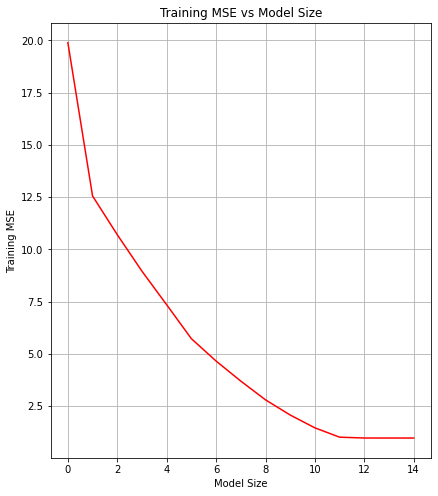

In [35]:
import itertools as it
from sklearn.linear_model import LinearRegression

def select_subset_sizeK(X_, y_, k):
    model = LinearRegression()
    best_score = 0.0
    M_k = []
    for combo in it.combinations(range(X_.shape[1]), k):
        X = X_[:, list(combo)]
        model.fit(X, y_)
        s = model.score(X, y_)
        if s > best_score:
            M_k = list(combo)
            best_score = s
    return M_k

def subset_selection(X_, y_):
    # Fit model with intercept only (Null model)
    train_MSE = {}
    model_cols = {}
    y_pred = np.mean(y_)
    train_MSE[0] = np.sum((y_ - y_pred)**2) / len(y_)
    for s in range(1, X_.shape[1]):
        cols = select_subset_sizeK(X_, y_, s)
        X = X_[:, cols]
        model = LinearRegression()
        model.fit(X, y_)
        y_pred = model.predict(X)
        train_MSE[s] = mean_squared_error(y_pred, y_)
        model_cols[s] = cols
    return (model_cols, train_MSE)

t = subset_selection(X_train, y_train)
models = t[0]
train_MSE = t[1]

fig = plt.figure(figsize=(15, 8))

lists = sorted(train_MSE.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
ax = fig.add_subplot(121)
plt.plot(x, y, color='r')
plt.grid()
ax.set_xlabel('Model Size')
ax.set_ylabel('Training MSE')
ax.set_title('Training MSE vs Model Size')

**(d) Plot the test set MSE associated with the best model of each size.**

Text(0.5, 1.0, 'Test MSE vs Model Size')

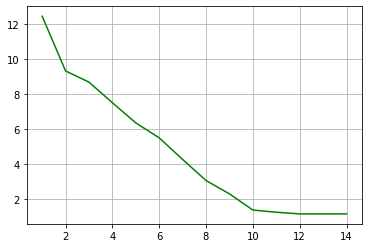

In [36]:
test_MSE = {}
for size, cols in models.items():
    if size == 0:
        test_MSE[size] = np.sum((y_test - cols)**2) / len(y_test)
    else:
        model = LinearRegression()
        model.fit(X_train[:, cols], y_train)
        y_pred = model.predict(X_test[:, cols])
        test_MSE[size] = mean_squared_error(y_pred, y_test)

lists = sorted(test_MSE.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
ax = fig.add_subplot(122)
plt.plot(x, y, color='g')
plt.grid()
ax.set_xlabel('Model Size')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Model Size')

**(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.**

In [37]:
print("Test MSE is minimum for model size: " +str(min(test_MSE, key=test_MSE.get)))

Test MSE is minimum for model size: 13


**(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.**

In [38]:
cols = models.get(min(test_MSE, key=test_MSE.get))
print("Columns used in the model: " +str(cols))
model = LinearRegression()
model.fit(X_train[:, cols], y_train)
print("Model Coefficients: " +str(model.coef_))

Columns used in the model: [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14]
Model Coefficients: [-1.4422 -1.0639  2.7853  0.0219  1.0328 -0.6791 -1.411   1.2882 -0.7784
 -0.9341  1.2837  0.8585 -0.2075]


The model is well in accordance with the way data is generated, First of all, the columns that are not used for model generation are: 5, 9. While generating data, we set the coefficients 3,5, and 9 to 0 and hence the model captures this well. Apart from this, the coefficient of feature 3 is -0.07353929, which is quite low as well.

**(g) Create a plot displaying $\sqrt{\sum_{j=1}^{p}\left(\beta_{j}-\hat{\beta}_{j}^{r}\right)^{2}}$ for a range of values of $r$, where $\hat{\beta}_{j}^{r}$ is the $j$ th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?**

# 10. Backward stepwise selection (30pt)

**In our Lecture 5 and Lab 5, we learned about backward stepwise selection. Implement backward stepwise selection by referring to the implementation of forward stepwise selection from Lab 5. As a result of the function, 1) print the best model (predictors) for each $k$, 2) perform cross validation, and 3) plot CV errors for each $k$ as shown in Section 1.3 of Lab 5**

In [39]:
hitters = pd.read_csv('data\Hitters.csv')

# Get the number of players  and the number of players with missing values
print('Hitters contains {} players'.format(len(hitters)))
num_missing = np.sum(hitters.isnull().any(axis=1))
print('We are missing data for {} players'.format(num_missing))

# now remove the missing players for dataframe
hitters = hitters.dropna()
print('After removal Hitters contains {} players'.format(len(hitters)))
print('Shape={}'.format(hitters.shape))
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

# Generate new dataframe with new dummy variables
df = hitters.drop(['League', 'Division', 'NewLeague'], axis=1)
# add new dummy variables
df = pd.concat([df, dummies[['League_N', 'Division_W', 'NewLeague_N']]],axis=1)

Hitters contains 322 players
We are missing data for 59 players
After removal Hitters contains 263 players
Shape=(263, 20)


In [40]:
from tqdm import tqdm # a python package that provides progress bars for iterables
from operator import itemgetter
from itertools import combinations
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import pdb
import statsmodels.api as sm
import scipy

predictors = list(df.columns)
predictors.remove('Salary')

def backward_step_select(df, predictors, response, max_features=len(predictors)):
    
    def process_linear_model(features):
        X = sm.add_constant(df[features])
        y = df[response]
        model = sm.OLS(y,X).fit()
        RSS = model.ssr
        return (model, RSS)

    def update_model(best_features):
        results = []
        for feature in best_features:
            results.append(process_linear_model( list( set(best_features) - set([feature]) ) ))
        new_model = sorted(results, key = itemgetter(1)).pop(0)[0]
        new_features = list(new_model.params.index)[1:]
        return new_features, new_model
    
    models = []
    best_features = predictors
    
    while best_features and len(best_features) <= max_features:        
        new_features, new_model = update_model(best_features)
        best_features = new_features  
        models.append((new_features,new_model))
    return models

In [41]:
models = backward_step_select(df, predictors, ['Salary'], max_features=19)

for model in models:
    print("Model with "+str(len(model[0]))+" features")
    print(model[0])

Model with 18 features
['PutOuts', 'NewLeague_N', 'CAtBat', 'AtBat', 'RBI', 'Walks', 'League_N', 'Runs', 'CRuns', 'CRBI', 'Years', 'Errors', 'Assists', 'Hits', 'HmRun', 'Division_W', 'CHits', 'CWalks']
Model with 17 features
['PutOuts', 'CAtBat', 'AtBat', 'NewLeague_N', 'RBI', 'Walks', 'League_N', 'Runs', 'CRuns', 'CRBI', 'Errors', 'Assists', 'Hits', 'HmRun', 'Division_W', 'CHits', 'CWalks']
Model with 16 features
['PutOuts', 'AtBat', 'CAtBat', 'RBI', 'Walks', 'League_N', 'Runs', 'CRuns', 'CRBI', 'Errors', 'Assists', 'Hits', 'HmRun', 'Division_W', 'CHits', 'CWalks']
Model with 15 features
['PutOuts', 'CAtBat', 'AtBat', 'Walks', 'League_N', 'Runs', 'CRuns', 'CRBI', 'Errors', 'Assists', 'Hits', 'HmRun', 'Division_W', 'CHits', 'CWalks']
Model with 14 features
['PutOuts', 'CAtBat', 'AtBat', 'Walks', 'CWalks', 'Errors', 'League_N', 'Runs', 'Assists', 'Hits', 'HmRun', 'CRuns', 'CRBI', 'Division_W']
Model with 13 features
['PutOuts', 'CAtBat', 'AtBat', 'Walks', 'Errors', 'League_N', 'Runs', '

In [42]:
# create an index to break the hitters dataframe into a train and test set that are roughly equal in size
np.random.seed(0)
index = np.random.choice([True, False], size=len(df))

# split the data into train and validation sets
df_train = df[index]
df_test = df[~index]

In [43]:
mses = np.array([])
for model in models:
    features = list(model[1].params.index[1:])
    X_test = sm.add_constant(df_test[features])
    salary_pred = model[1].predict(X_test)
    mses = np.append(mses, np.mean((salary_pred - df_test.Salary.values)**2))
print('MSEs =', mses)

MSEs = [114820.4977 114993.4274 114707.6852 114433.649  115188.6703 114403.5799
 115220.6704 115798.848  116033.5823 119296.528  118659.6022 122986.5159
 130877.3664 136975.9028 141714.8566 147823.0504 156110.3858 170183.8098
 244553.3978]


In [44]:
min_index, min_mse = min(enumerate(mses), key=itemgetter(1))
print(min_index, min_mse)

5 114403.5798616264


In [45]:
print('14-Variable Model:', list(models[5][1].params.index))

14-Variable Model: ['const', 'PutOuts', 'CAtBat', 'AtBat', 'Walks', 'Errors', 'League_N', 'Runs', 'Assists', 'Hits', 'Division_W', 'CRuns', 'CRBI', 'CWalks']


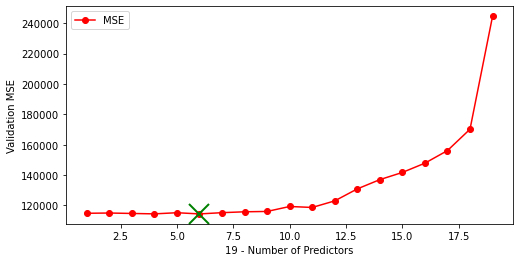

In [46]:
# We can also plot all the models MSEs
# set predictors for x-axis
num_predictors = np.linspace(1,len(models),len(models)).astype(int)

fig, ax1 = plt.subplots(figsize=(8,4));

# add the mse and mimimum mse to the plot
ax1.plot(num_predictors, mses, 'r', marker='o', label='MSE')
ax1.plot(min_index+1, min_mse, 'gx', markersize=20, markeredgewidth=2)

# Labels and Legend
ax1.set_xlabel('19 - Number of Predictors');
ax1.set_ylabel('Validation MSE');
ax1.legend(loc='best');

In [47]:
# Create the 10 folds using sklearn KFolds
kf = KFold(n_splits=10, random_state=1)

mses = np.zeros([10, len(predictors)])

for fold, (train, test) in enumerate(kf.split(df)):
    # split data for this fold
    df_train = df.iloc[train]
    df_test = df.iloc[test]
    
    # compute the best model subsets using our function
    models = backward_step_select(df_train, predictors, ['Salary'], max_features=19)
    
    # compute the MSE of each model
    for idx, model in enumerate(models):
        # get the predictors for this model, ignore constant
        features = list(model[1].params.index[1:])
    
        # get the corresponding columns of df_test
        X_test = sm.add_constant(df_test[features])
    
        # make prediction for this model
        salary_pred = model[1].predict(X_test)
    
        # get the MSE for this model and fold
        mses[fold, idx] = np.mean((salary_pred - df_test.Salary.values)**2)
        
# now we can compute the mean MSE across folds, one per model with idx features
cvs = np.mean(mses, axis=0)

C:\Users\Mark Mintae Kim\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


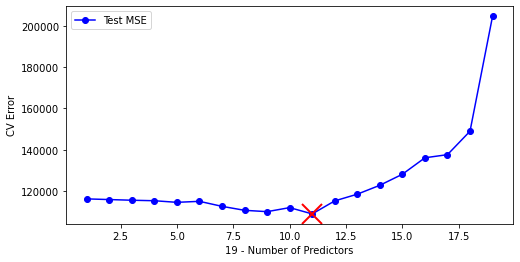

In [48]:
# We can also plot all the models CV-Errors
# set predictors for x-axis
num_predictors = np.linspace(1,len(models),len(models))

fig, ax1 = plt.subplots(figsize=(8,4));

# get the minimum in the CV
min_index, min_CV = min(enumerate(cvs), key = itemgetter(1))

# add the mse and mimimum mse to the plot
ax1.plot(num_predictors, cvs, 'b', marker='o', label='Test MSE')
ax1.plot(min_index+1, min_CV, 'rx', markersize=20, markeredgewidth=2)

# Labels and Legend
ax1.set_xlabel('19 - Number of Predictors');
ax1.set_ylabel('CV Error');
ax1.legend(loc='best');

# 11. Ridge regression (20pt)

**1) Perform direct approach to optimize the ridge regression on ````Boston```` dataset, and store the estimated beta to ````beta_direct````.**

In [49]:
from numpy.linalg import inv
# load data
boston = pd.read_csv('data/Boston.csv')
# regression using 2 columns
X_train = boston["lstat"].values
X_train = sm.add_constant(X_train)
y_true = boston['medv'].values

penalty_lambda_1 = 1 * np.identity(2)
penalty_lambda_2 = 2 * np.identity(2)
penalty_lambda_3 = 3 * np.identity(2)
penalty_lambda_4 = 0.5 * np.identity(2)
penalty_lambda_5 = 0.1 * np.identity(2)

beta_direct_1 = inv(X_train.T.dot(X_train)+penalty_lambda_1).dot(X_train.T).dot(y_true)
beta_direct_2 = inv(X_train.T.dot(X_train)+penalty_lambda_2).dot(X_train.T).dot(y_true)
beta_direct_3 = inv(X_train.T.dot(X_train)+penalty_lambda_3).dot(X_train.T).dot(y_true)
beta_direct_4 = inv(X_train.T.dot(X_train)+penalty_lambda_4).dot(X_train.T).dot(y_true)
beta_direct_5 = inv(X_train.T.dot(X_train)+penalty_lambda_5).dot(X_train.T).dot(y_true)

print("Directly learned parameters with lambda = 1: {}".format(beta_direct_1))
print("Directly learned parameters with lambda = 2: {}".format(beta_direct_2))
print("Directly learned parameters with lambda = 3: {}".format(beta_direct_3))
print("Directly learned parameters with lambda = 0.5: {}".format(beta_direct_4))
print("Directly learned parameters with lambda = 0.1: {}".format(beta_direct_5))

print("\nDirectly learned parameters with lambda tends to become smaller when lambda gets larger.")

Directly learned parameters with lambda = 1: [34.2726 -0.9332]
Directly learned parameters with lambda = 2: [33.9959 -0.9166]
Directly learned parameters with lambda = 3: [33.7236 -0.9002]
Directly learned parameters with lambda = 0.5: [34.4126 -0.9416]
Directly learned parameters with lambda = 0.1: [34.5255 -0.9483]

Directly learned parameters with lambda tends to become smaller when lambda gets larger.


**2) Perform gradient descent (Batch gradient descent) to optimize the ridge regression on ````Boston```` dataset, and store the estimated beta to ````beta````.**

Learned parameters through GD: [34.2656 -0.9327]


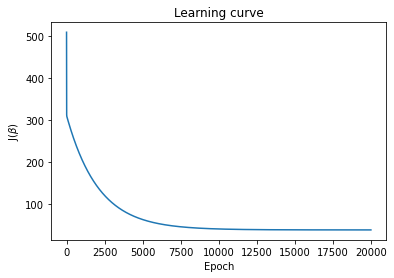

In [50]:
import statsmodels.api as sm

# load data
boston = pd.read_csv('data\Boston.csv')
# regression using all input columns
X_train = boston[["lstat"]].values
X_train = sm.add_constant(X_train)
y_train = boston['medv'].values

beta = np.random.rand(2)
alpha = 0.001  # The learning Rate
epochs = 20000  # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X

penalty_lambda = 0.0001

cost = []

# Performing gradient descent
for epoch in range(epochs): 
    y_pred = np.dot(X_train, beta)
    error = y_pred - y_train    
    dbeta = (1/n) * np.dot(X_train.T, error) + penalty_lambda * beta
    beta = beta - alpha * dbeta
    J = (1/n) * np.dot(error.T, error) - penalty_lambda * np.dot(beta.T, beta)
    cost.append(J)

plt.plot(np.arange(epochs), cost)
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel(r"J($\beta$)");

print("Learned parameters through GD: {}".format(beta))